In [1]:
import cython
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import pandas as pd


from matplotlib.image import imread

from theano import scan
import theano.tensor as tt

from pymc3.distributions import continuous
from pymc3.distributions import distribution

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
K = 4
n = 100
mu_0 = {0: [10, 10],
        1: [20, 20],
        2: [22, 14],
        3: [11, 16]}

sigma_0 = np.array([[1, 0],
                    [0, 1]])

pi = [0.15, 0.25, 0.15, 0.45]

In [15]:
x = {i: np.random.multivariate_normal(mean=mu_0[i], 
                                      cov=sigma_0, 
                                      size=[np.random.randint(low=15, high=50, size=None)]) for i in range(K)}

x = []
cluster = []

for _ in range(n):
    x_cluster = np.random.choice([0, 1, 2, 3], size=[1,], p=pi)[0]
    x.append(np.random.multivariate_normal(mean=mu_0[x_cluster],
                                           cov=sigma_0,
                                           size=[1,]).tolist()[0])
    cluster.append(x_cluster)
    
x = np.array(x)

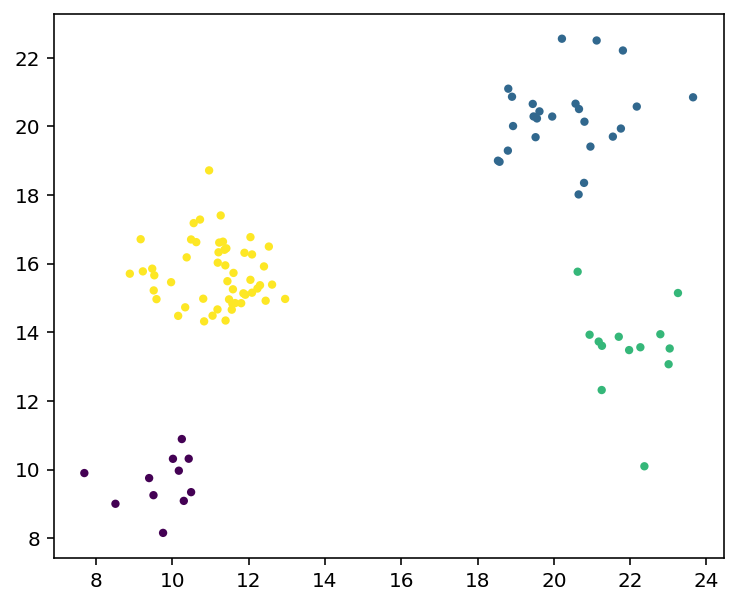

In [16]:
fig = plt.figure(figsize=(6, 5))
plt.scatter(x[:, 0], x[:, 1], s=10, c=cluster)

In [21]:
with pm.Model() as model:
    p = pm.Dirichlet("p", a=[2, 2, 2, 2])
    Sigma = pm.LKJCholeskyCov("cov", n=2, eta=2, sd_dist=pm.InverseGamma("sd", alpha=2, beta=4))
    L = pm.expand_packed_triangular(2, Sigma)
    
    category = pm.Categorical("category", p=p)
    means = pm.MvNormal("means", mu=[[15, 15]]*4, cov=[[10, 0], [0, 10]])
    
    obs = pm.MvNormal("obs", mu=means, chol=L, observed=x)
    
    trace = pm.sample(draws=2000, chains=3, tune=2000)
    posterior_pred = pm.sample_posterior_predictive(trace)

AttributeError: 'TransformedRV' object has no attribute 'logp'